In [1]:
import os, json, sys
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from skimage.metrics import structural_similarity as ssim
from skimage.util import random_noise
from sklearn.metrics import mean_squared_error


In [2]:
in_notebooks_dir = (
    (os.path.basename(os.getcwd()) == 'notebooks') and 
    (os.path.exists(os.path.join(os.path.dirname(os.getcwd()), 'src')))
)
if in_notebooks_dir:
    os.chdir(os.path.dirname(os.getcwd()))

srcdir = os.path.join('..', 'src')
if srcdir not in sys.path:
    sys.path.insert(0, srcdir)

In [3]:
import src.utils.np_utils as npu

In [4]:
path_data = os.getcwd()+'/data/'
path_train = path_data + "processed/mini_train/"
path_gt = path_data + "processed/mini_gt/"

In [5]:
path_data

'/home/endrit_p/Documents/Spring23_CGG/data/'

In [6]:
train_imgs = []
gt_imgs = []

In [7]:
for fn in os.listdir(path_train):
    train_imgs.append(npu.load_image_as_np(path_train + fn))
    gt_imgs.append(npu.load_image_as_np(path_gt + fn))

In [8]:
for i, img in enumerate(train_imgs):
    train_imgs[i] = npu.resize_image(img, (gt_imgs[i].shape[1], gt_imgs[i].shape[0]))

In [9]:
gt_imgs[0].shape

(1064, 1038, 3)

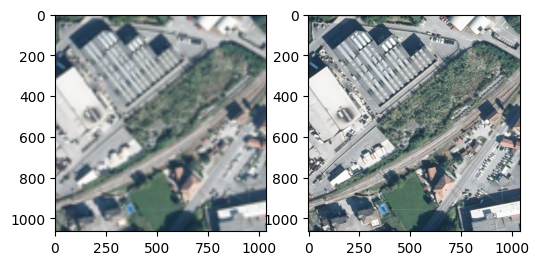

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(6, 3))

ax[0].imshow(train_imgs[0])
ax[1].imshow(gt_imgs[0])

In [11]:
def compute_mse_errors(imgs_pred, imgs_gt, filenames):
    '''
    Computes mean squared error metrics for pred vs ground truth
    Args:
        imgs_pred: prediction images (list of numpy arrays)
        imgs_gt: ground truth images (list of numpy arrays)
        filenames: list of image filenames (str)
    Returns:
        dictionary of mse stats
    '''
    mse_list = []
    for im_pred, im_gt in zip(imgs_pred, imgs_gt):
        mse_list.append(mean_squared_error(im_gt.flatten(), im_pred.flatten()))
    
    mse_stats = {
        'mean_mse': np.mean(mse_list),
        'max_mse': np.max(mse_list),
        'max_mse_file': filenames[np.argmax(mse_list)],
        'min_mse': np.min(mse_list),
        'min_mse_file': filenames[np.argmin(mse_list)]
    }
    
    return mse_stats

In [12]:
def compute_psnr_errors(imgs_pred, imgs_gt, filenames):
    '''
    Computes peak signal to noise ratio metrics for pred vs ground truth
    Args:
        imgs_pred: prediction images (list of numpy arrays)
        imgs_gt: ground truth images (list of numpy arrays)
        filenames: list of image filenames (str)
    Returns:
        dictionary of psnr stats
    '''
    psnr_list = []
    for im_pred, im_gt in zip(imgs_pred, imgs_gt):
        psnr_list.append(cv2.PSNR(im_gt, im_pred))
    
    psnr_stats = {
        'mean_psnr': np.mean(psnr_list),
        'max_psnr': np.max(psnr_list),
        'max_psnr_file': filenames[np.argmax(psnr_list)],
        'min_psnr': np.min(psnr_list),
        'min_psnr_file': filenames[np.argmin(psnr_list)]
    }
    
    return psnr_stats

In [20]:
def compute_ssim_errors(imgs_pred, imgs_gt, filenames):
    '''
    Computes structural similarity index for pred vs ground truth
    Args:
        imgs_pred: prediction images (list of numpy arrays)
        imgs_gt: ground truth images (list of numpy arrays)
        filenames: list of image filenames (str)
    Returns:
        dictionary of ssim stats
    '''
    ssim_list = []
    for im_pred, im_gt in zip(imgs_pred, imgs_gt):
        ssim_list.append(ssim(im_gt.flatten(), im_pred.flatten()))
    
    ssim_stats = {
        'mean_ssim': np.mean(ssim_list),
        'max_ssim': np.max(ssim_list),
        'max_ssim_file': filenames[np.argmax(ssim_list)],
        'min_ssim': np.min(ssim_list),
        'min_ssim_file': filenames[np.argmin(ssim_list)]
    }
    
    return ssim_stats

In [27]:
dict_mse = compute_mse_errors(train_imgs, gt_imgs, os.listdir(path_train))

In [28]:
dict_psnr = compute_psnr_errors(train_imgs, gt_imgs, os.listdir(path_train))

In [29]:
dict_ssim = compute_ssim_errors(train_imgs, gt_imgs, os.listdir(path_train))

In [39]:
dict_merged = {**dict_mse, **dict_psnr, **dict_ssim}